In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

In [3]:
# List all files in the current directory
dir = '../data.lbm/fixedParticle/'
# os.listdir(dir)

# Partícula

In [4]:
particleDf = pd.read_csv(dir+"particlesTrj.csv")
particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
0,0,0.0,1,0.0,0.0,0.0,0.0,0.01
1,10,0.2,1,0.0,0.0,0.0,0.0,0.01
2,20,0.4,1,0.0,0.0,0.0,0.0,0.01
3,30,0.6,1,0.0,0.0,0.0,0.0,0.01
4,40,0.8,1,0.0,0.0,0.0,0.0,0.01
...,...,...,...,...,...,...,...,...
296,2960,59.2,1,0.0,0.0,0.0,0.0,0.01
297,2970,59.4,1,0.0,0.0,0.0,0.0,0.01
298,2980,59.6,1,0.0,0.0,0.0,0.0,0.01
299,2990,59.8,1,0.0,0.0,0.0,0.0,0.01


# Fluido

In [5]:
tick = 3000
fluidDf = pd.read_csv(dir + f"fluidTrj_{tick}.csv").set_index(["id_x","id_y"]).sort_index()

fluidDf

tick  time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                        
1    1     3000  60.0          -2.0         -2.00          0.0   
     2     3000  60.0          -2.0         -1.98          0.0   
     3     3000  60.0          -2.0         -1.96          0.0   
     4     3000  60.0          -2.0         -1.94          0.0   
     5     3000  60.0          -2.0         -1.92          0.0   
...         ...   ...           ...           ...          ...   
201  197   3000  60.0           2.0          1.92          0.0   
     198   3000  60.0           2.0          1.94          0.0   
     199   3000  60.0           2.0          1.96          0.0   
     200   3000  60.0           2.0          1.98          0.0   
     201   3000  60.0           2.0          2.00          0.0   

           fluidVelocity_x  fluidVelocity_y   f1   f2   f3   f4   f5   f6  \
id_x id_y                                                                   
1    1                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     2                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     3                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     4                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     5                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                    ...              ...  ...  ...  ...  ...  ...  ...   
201  197               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     198               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     199               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     200               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     201               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            f7   f8   f9  
id_x id_y                 
1    1     0.0  0.0  0.0  
     2     0.0  0.0  0.0  
     3     0.0  0.0  0.0  
     4     0.0  0.0  0.0  
     5     0.0  0.0  0.0  
...        ...  ...  ...  
201  197   0.0  0.0  0.0  
     198   0.0  0.0  0.0  
     199   0.0  0.0  0.0  
     200   0.0  0.0  0.0  
     201   0.0  0.0  0.0  

[40401 rows x 16 columns]

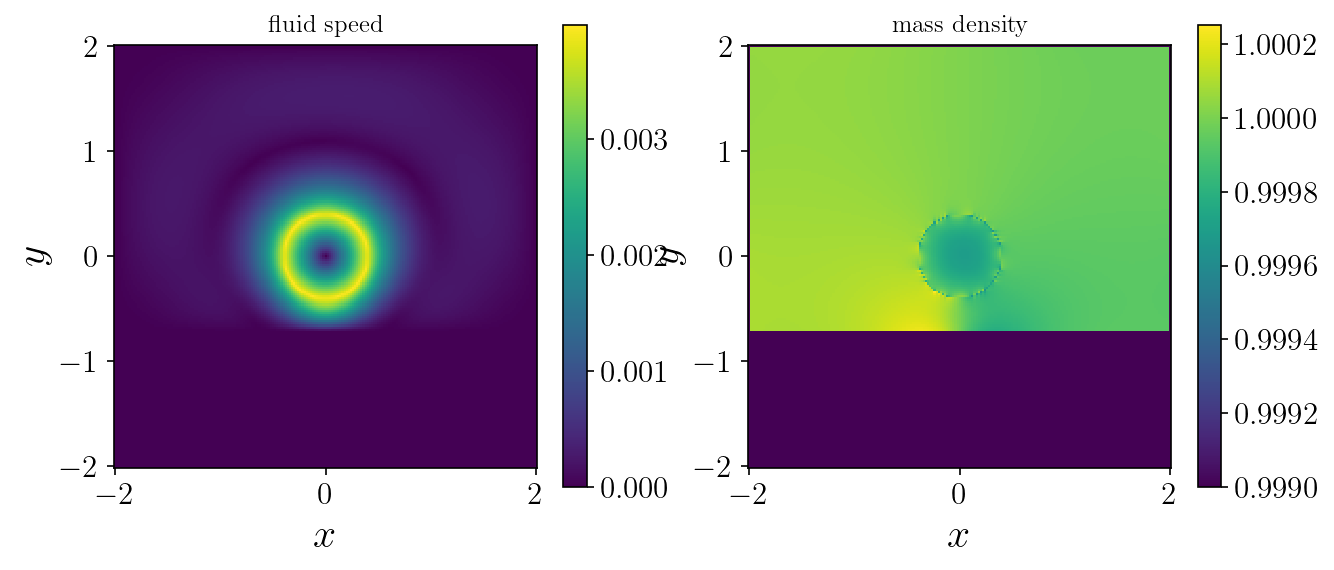

In [6]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X,Y,
    np.sqrt(fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
); cs.append(c);
axes[0].set_title('fluid speed')

c = axes[1].pcolormesh(X,Y,
    fluidDf.massDensity.unstack().values.transpose(),
    vmin=0.999
); cs.append(c);
axes[1].set_title('mass density')


for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    fig.colorbar(c, ax=ax, shrink=.8)  # 'shrink' adjusts the size, 'aspect' adjusts width


plt.show()

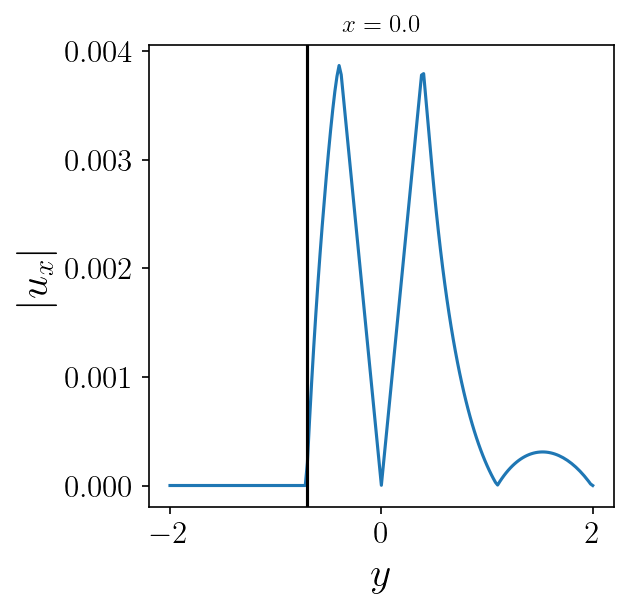

In [7]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = fluidDf.query("coordinate_x >= 0").reset_index().iloc[0].filter(["id_x"]).values[0]

# ploteo v_x(y, x = 0)
v_x = fluidDf.loc[id].filter(["coordinate_y", "fluidVelocity_x"])

wallPosition = -0.7

plt.plot(v_x.coordinate_y, abs(v_x.fluidVelocity_x)) 
plt.axvline(wallPosition, color = "k")
plt.xlabel("$y$")
plt.ylabel("$|u_x|$")
plt.title(f"$x = {fluidDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$")

plt.show()

# Tensor de estrés

## imponiendo que la partícula esté fija

In [8]:
stressDf = pd.read_csv(dir + "stressTensor.csv").set_index(["id_x","id_y"]).sort_index()

stressDf

tick  time  coordinate_x  coordinate_y  component_xx  component_yx  \
id_x id_y                                                                       
1    1     3000  60.0          -2.0         -2.00          -0.0          -0.0   
     2     3000  60.0          -2.0         -1.98          -0.0          -0.0   
     3     3000  60.0          -2.0         -1.96          -0.0          -0.0   
     4     3000  60.0          -2.0         -1.94          -0.0          -0.0   
     5     3000  60.0          -2.0         -1.92          -0.0          -0.0   
...         ...   ...           ...           ...           ...           ...   
201  197   3000  60.0           2.0          1.92          -0.0          -0.0   
     198   3000  60.0           2.0          1.94          -0.0          -0.0   
     199   3000  60.0           2.0          1.96          -0.0          -0.0   
     200   3000  60.0           2.0          1.98          -0.0          -0.0   
     201   3000  60.0           2.0          2.00          -0.0          -0.0   

           component_xy  component_yy  
id_x id_y                              
1    1             -0.0          -0.0  
     2             -0.0          -0.0  
     3             -0.0          -0.0  
     4             -0.0          -0.0  
     5             -0.0          -0.0  
...                 ...           ...  
201  197           -0.0          -0.0  
     198           -0.0          -0.0  
     199           -0.0          -0.0  
     200           -0.0          -0.0  
     201           -0.0          -0.0  

[40401 rows x 8 columns]

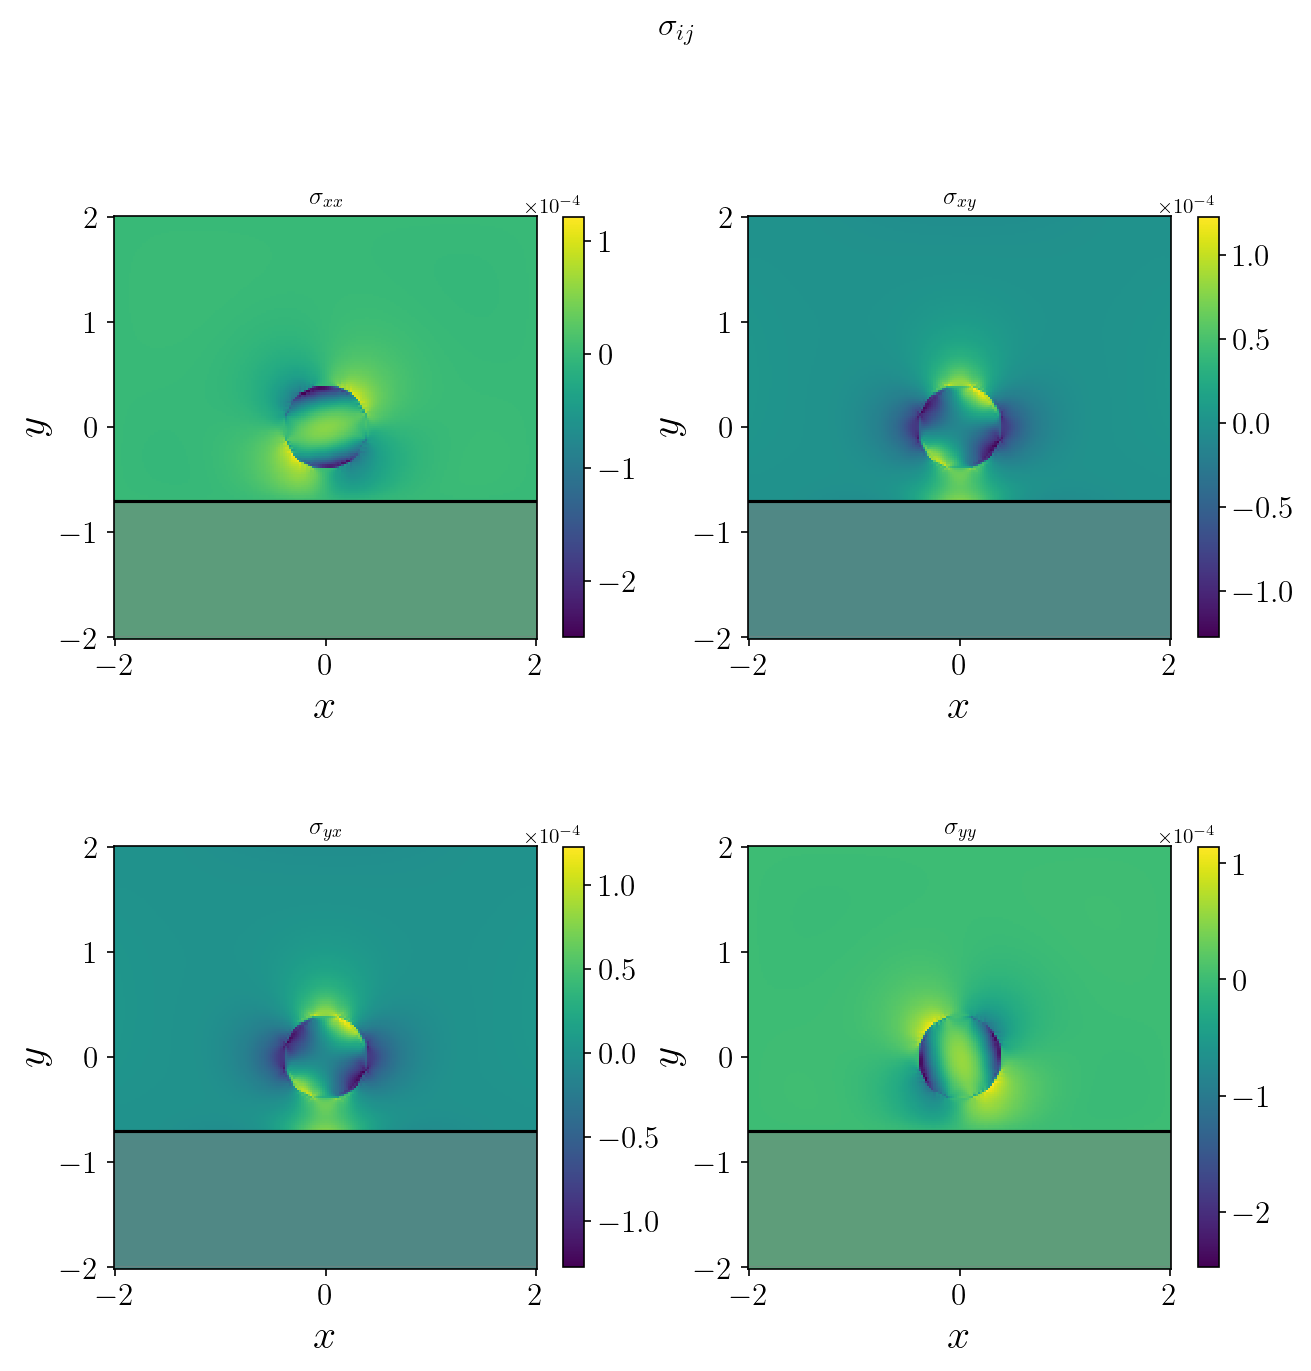

In [9]:
# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = stressDf['coordinate_x'].unique()
y_unique = stressDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

# plotting
c = axes[0,0].pcolormesh(X,Y,stressDf["component_xx"].unstack().values.transpose()); cs.append(c);
axes[0,0].set_title("$\\sigma_{xx}$")

c = axes[0,1].pcolormesh(X,Y,stressDf["component_xy"].unstack().values.transpose()); cs.append(c);
axes[0,1].set_title("$\\sigma_{xy}$")

c = axes[1,0].pcolormesh(X,Y,stressDf["component_yx"].unstack().values.transpose()); cs.append(c);
axes[1,0].set_title("$\\sigma_{yx}$")

c = axes[1,1].pcolormesh(X,Y,stressDf["component_yy"].unstack().values.transpose()); cs.append(c);
axes[1,1].set_title("$\\sigma_{yy}$")

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

# for ax in axes.flat:
for i in range(4):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")    
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary
    ax.axhline(wallPosition, color = "k")
    ax.axhspan(-2, wallPosition, color='gray', alpha=0.5)  # Shade the wall

plt.show()

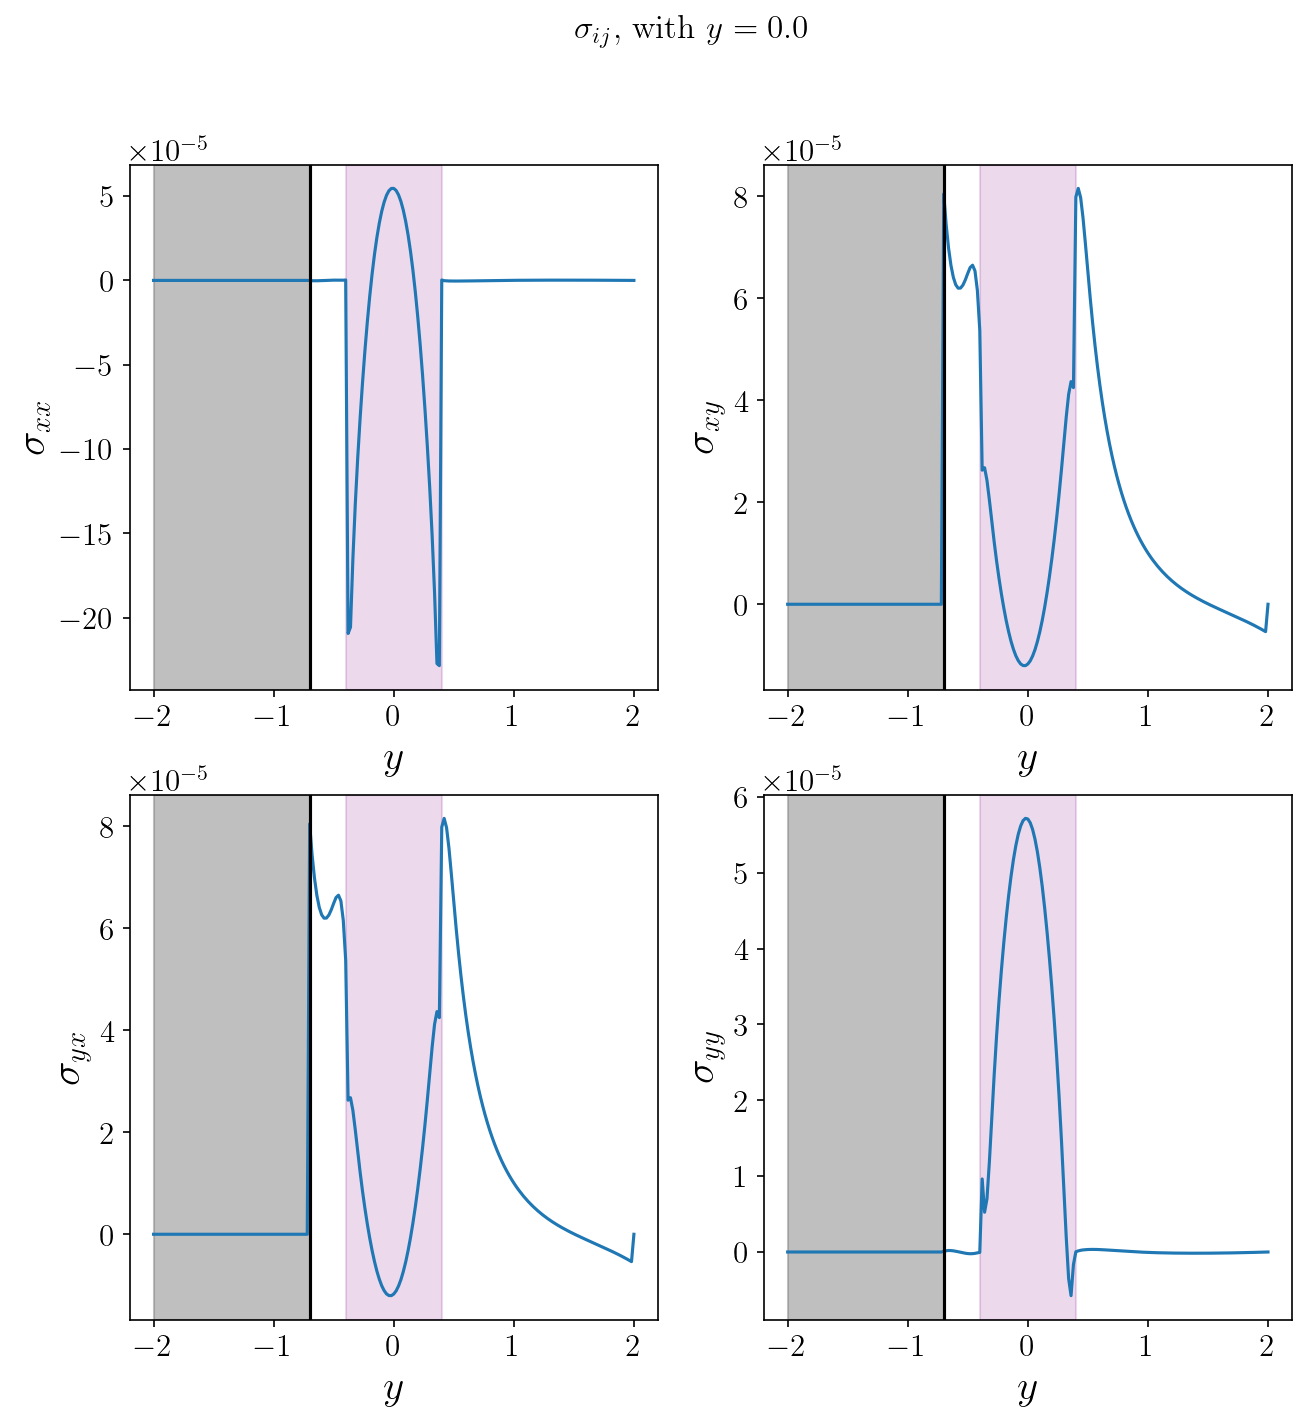

In [10]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = stressDf.query("coordinate_x >= 0").reset_index().iloc[0].filter(["id_x"]).values[0]

# ploteo v_x(y, x = 0)
sigma_x = stressDf.loc[id].filter(["coordinate_y", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_x.coordinate_y, sigma_x.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_x.coordinate_y, sigma_x.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_x.coordinate_y, sigma_x.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_x.coordinate_y, sigma_x.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$y$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvline(wallPosition, color = "k")
    ax.axvspan(-2, wallPosition, color='gray', alpha=0.5)  # Shade the wall
    ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

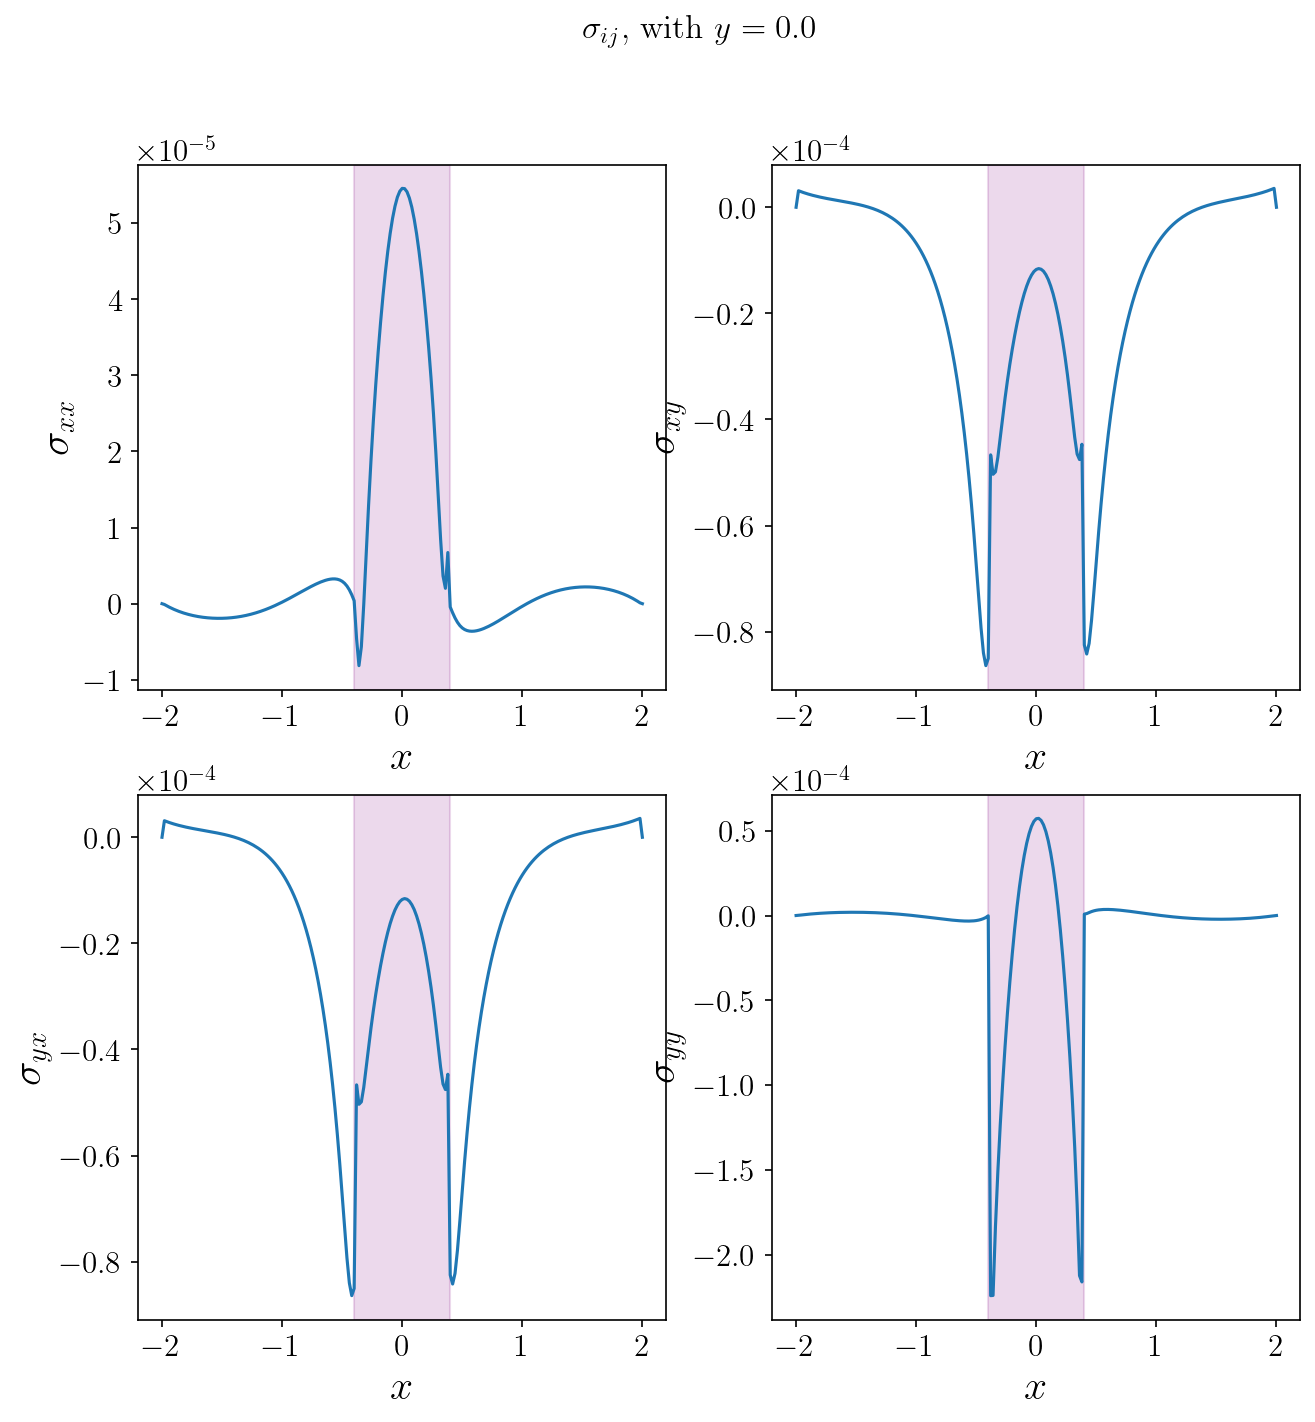

In [11]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = stressDf.query("coordinate_y >= 0").reset_index().iloc[0].filter(["id_y"]).values[0]

sigma_y = stressDf.query(f"id_y == {id}").filter(["coordinate_x", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_y == {id}").iloc[0].filter(["coordinate_y"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_y.coordinate_x, sigma_y.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_y.coordinate_x, sigma_y.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_y.coordinate_x, sigma_y.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_y.coordinate_x, sigma_y.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$x$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere